In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

%config InlineBackend.figure_formats=['svg']

---
### Two Two-Level System(TLS) coupled dispersively to the same electromagnetic cavity

The Hamiltonian is given as $$H =
\sum_{i=1}^{2} \frac{\omega_i}{2}\sigma_{z,i}
+
\omega_r a^\dagger a + \sum_{i=1}^{2} g_i
\left(
a\sigma_{+,i} + a^\dagger\sigma_{-,i}
\right)$$

In [2]:
# Parameters

# Frequency of the TLS
w1 = 1
w2 = 1.5

# Coupling strength of TLS to the Cavity
g1 = 0.3
g2 = 0.5

# frequency of the Resonator
wr = 3

# Detuning
Delta1 = w1 - wr
Delta2 = w2 - wr

# Coupling Strength bewteen the qubits in the dispersive limit
J = -g1 * g2/2 *(1/Delta1 + 1/Delta2)
print(f"Coupling Strength: {J}")

Coupling Strength: 0.08749999999999998


In [3]:
# Qubit-Qubit operators

sx1 = tensor(sigmax(), qeye(2))
sy1 = tensor(sigmay(), qeye(2))
sz1 = tensor(sigmaz(), qeye(2))

sm1 = tensor(sigmam(), qeye(2))
sp1 = tensor(sigmap(), qeye(2))


sx2 = tensor(qeye(2), sigmax())
sy2 = tensor(qeye(2), sigmay())
sz2 = tensor(qeye(2), sigmaz())

sm2 = tensor(qeye(2), sigmam())
sp2 = tensor(qeye(2), sigmap())

### Dispersive Limit Hamiltonian

In the dispersive limit, Hamiltonian is given as $$H_{\mathrm{eff}}^{(0)}
=\sum_{i=1}^{2} \frac{\omega_i}{2}\sigma_{z,i}
+
J
\left(
\sigma_{+,1}\sigma_{-,2}
+
\sigma_{-,1}\sigma_{+,2}
\right)$$

In [4]:
H = w1/2 * sz1 + w2/2 * sz2 + J * (sm1 * sp2 + sp1 * sm2)

$$\sigma_{x1}\sigma_{x2} + \sigma_{y1} \sigma_{y2} = 2(\sigma_{+,1}\sigma_{+,2}+\sigma_{-,1}\sigma_{-,2})$$

Retreating the Hamiltonian and absorbing the factor of 1/2 into J, we get
$$H_{\mathrm{eff}}
=\sum_{i=1}^{2} \frac{\omega_i}{2}\sigma_{z,i}
+
J
\left(
\sigma_{x1}\sigma_{x2} + \sigma_{y1}\sigma_{y2}
\right)$$

# Driving the Qubit

To entangle the qubit 1 (q1) and qubit 2 (q2), we need to drive q1 with q2's resonant frequency.
\
\
Full Hamiltonian of the System with the drive is given as
$$H_{\mathrm{eff}}(t)
=\sum_{i=1}^{2} \frac{\omega_i}{2}\sigma_{z,i}
+
J\left(
\sigma_{x1}\sigma_{x2} + \sigma_{y1}\sigma_{y2}
\right)
+
\Omega \cos(\omega_d t)\,\sigma_{x1}$$

In [5]:
def drive(t, args):
    return args["A"] * np.cos(args["wd"] * t)

# Transform the Hamiltonian into the Rotating Frame

Hamiltonian in the rotating frame is given as
$$H_{\mathrm{rot}}
=\frac{\delta_1}{2}\sigma_{z1}
+
\frac{\delta_2}{2}\sigma_{z2}
+
\frac{\Omega}{2}\sigma_{x1}
+
J\left(
\sigma_{x1}\sigma_{x2} + \sigma_{y1}\sigma_{y2}
\right)$$


### Initial state
$$\psi_0 = \frac{1}{\sqrt{2}} \big(\ket{1}\otimes\ket{0}\big)$$

In [6]:
tlist = np.linspace(0, 40, 1000)
psi0 = tensor(basis(2, 1), basis(2, 0))

## Test Case
We will set the amplitude of the drive as $\Omega$ = 0. since $\omega_d = \omega_2 \implies \delta_2 = 0$. By setting $\Omega=0$ and in addition to that we will also set $\delta_1 = 0$, to observe coherent oscillation between the states $\ket{10}$ and $\ket{01}$ due to the interaction term. In this case, the Effective Hamiltonian is given as $$H_{eff} = J\left(
\sigma_{x1}\sigma_{x2} + \sigma_{y1}\sigma_{y2}
\right)$$with $\Omega = 0, \delta_1 = 0, \delta_2 = 0$

In [7]:
wd = w2
delta1 = w1 - w1
Omega = 0

Hrot = delta1/2 * sz1 + Omega/2 * sx1 + J * (sx1 * sx2 + sy1 * sy2)
proj10 = tensor(basis(2, 1), basis(2, 0)) * tensor(basis(2, 1), basis(2, 0)).dag()
proj01 = tensor(basis(2, 0), basis(2, 1)) * tensor(basis(2, 0), basis(2, 1)).dag()

result = sesolve(Hrot, psi0, tlist, e_ops=[proj10, proj01])

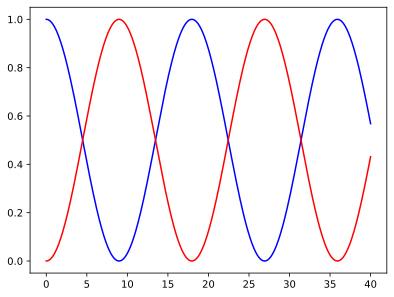

In [8]:
plt.plot(tlist, result.expect[0], 'b')
plt.plot(tlist, result.expect[1], 'r')

 -----

### Conditional Rabi Oscillations and Extraction of $J_{ZX}$ ($\Omega \gg J$)

In the strong-drive regime $\Omega \gg J$, the control qubit is effectively
frozen in an eigenstate of $\sigma_{x1}$. As a result, its expectation value
$\langle \sigma_{x1} \rangle$ remains stationary during the evolution, and the
interaction induces conditional dynamics on the target qubit.

In this limit, the effective Hamiltonian reduces to
$$
H_{\mathrm{eff}}^{(\pm)} = \pm J_{ZX}\,\sigma_{x2},
$$
where the sign depends on whether the control qubit is initialized in the
$\ket{+}$ or $\ket{-}$ eigenstate of $\sigma_{x1}$.

This Hamiltonian generates a rotation of the target-qubit Bloch vector about the
$x_2$ axis. Starting from the initial state $\ket{0}_2$, such a rotation
induces oscillations in observables orthogonal to the rotation axis. In
particular, the expectation value $\langle \sigma_{y2} \rangle$ exhibits Rabi
oscillations with opposite phase for the $\ket{+}$ and $\ket{-}$ control
states.

The oscillation frequency is directly related to the effective coupling strength,
allowing $J_{ZX}$ to be extracted from the measured period $T$ via
$$
J_{ZX} = \frac{\pi}{T}.
$$

This procedure provides a direct numerical verification of the emergent
conditional $ZX$ interaction derived analytically.


In [41]:
Omega = 1
J = 0.1

H = Omega/2 * sx1 + J * (sx1 * sx2 + sy1 * sy2)

psi_plus = tensor((basis(2, 0) + basis(2, 1)).unit(), basis(2, 0))
psi_minus = tensor((basis(2, 0) - basis(2, 1)).unit(), basis(2, 0))


tlist = np.linspace(0, 100, 1000)

result_plus = sesolve(H, psi_plus, tlist)
result_minus = sesolve(H, psi_minus, tlist)

In [42]:
Y2_plus = []
for state in result_plus.states:
    Y2_plus.append(expect(sy2, state))

Y2_minus = []
for state in result_minus.states:
    Y2_minus.append(expect(sy2, state))

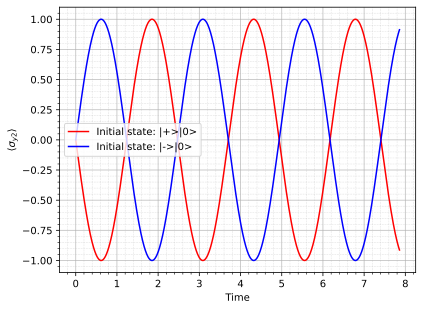

In [53]:
plt.plot(tlist, Y2_plus, 'r', label='Initial state: |+>|0>')
plt.plot(tlist, Y2_minus, 'b', label='Initial state: |->|0>')
plt.xlabel('Time')
plt.ylabel(r'$\langle\sigma_{y2}\rangle$')
plt.legend()
plt.minorticks_on()
plt.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.8)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5, alpha=0.4)
plt.show()

In [44]:
# Extracting the Rabi-period

dy = np.gradient(Y2_plus, tlist) 

sign_change = np.where((dy[:-1]>0) & (dy[1:]<0))[0] + 1

tchange = tlist[sign_change]

T = np.mean(np.diff(tchange))
print(f"Rabi Time period: {T}")

Rabi Time period: 31.431431431431434


In [54]:
# Effective Interaction Strength
Jzx = np.pi/T
Jzx

np.float64(0.09995067073045233)

### Initial State
$$\psi_0 = \frac{1}{\sqrt{2}} \big(\ket{0}+\ket{1}\big)\ket{0}$$

### Effective Hamiltonian
$$H_{ZX} = J_{ZX}  \sigma_{z1} \sigma_{x2}$$

In [55]:
psi0 = tensor((basis(2, 0) + basis(2, 1)).unit(), basis(2, 0))

H = Jzx * sz1 * sx2

tlist = np.linspace(0, np.pi/(4 * Jzx), 1000)

result = sesolve(H, psi0, tlist)

In [56]:
psi_final = result.states[-1]
rho_final = psi_final * psi_final.dag()
rho = ptrace(rho_final, 1)
entropy_vn(rho)

np.float64(0.6931471805599314)

### Entanglement Verification via von Neumann Entropy

After evolving the initial state $\ket{+}_1\ket{0}_2$ under the effective
Hamiltonian $H_{ZX} = J_{ZX}\,\sigma_{z1}\sigma_{x2}$ for a duration
$t = \pi/(4J_{ZX})$, we compute the reduced density matrix of the target qubit
and evaluate its von Neumann entropy.

Numerically, we obtain
$$
S = 0.6931471805599314,
$$
which agrees with the exact value $S = \ln 2 = 0.6931471805599453$ to numerical precision. This
confirms that the final state is maximally entangled, verifying successful
Bell-state generation driven by the effective conditional $ZX$ interaction.
